In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWhQ_Gj34qgNbpT7CRW5WFFpevGHr5ebXgxBgOOKDVeXmHmdn4ocWOo
Mounted at /content/drive


In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [4]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

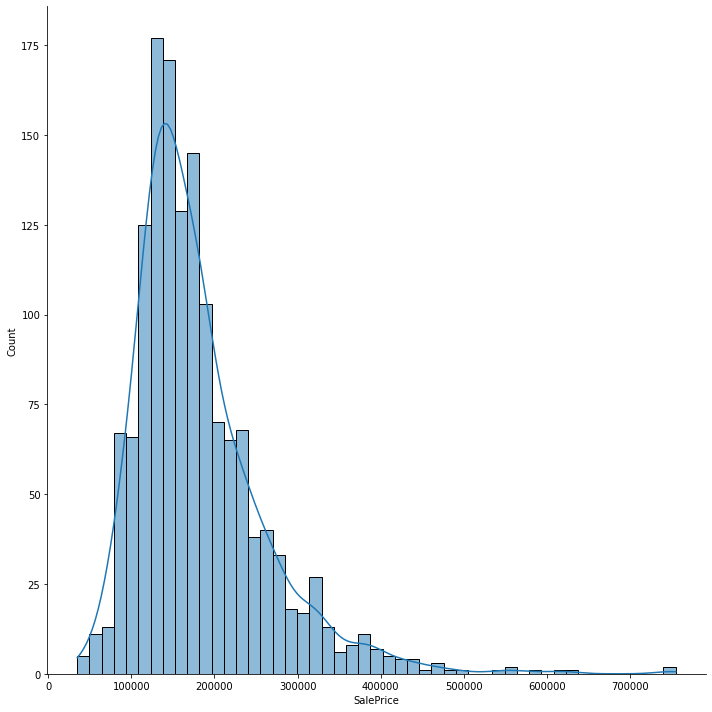

In [9]:
sns.displot(data=train, x="SalePrice", kde=True, height=10)

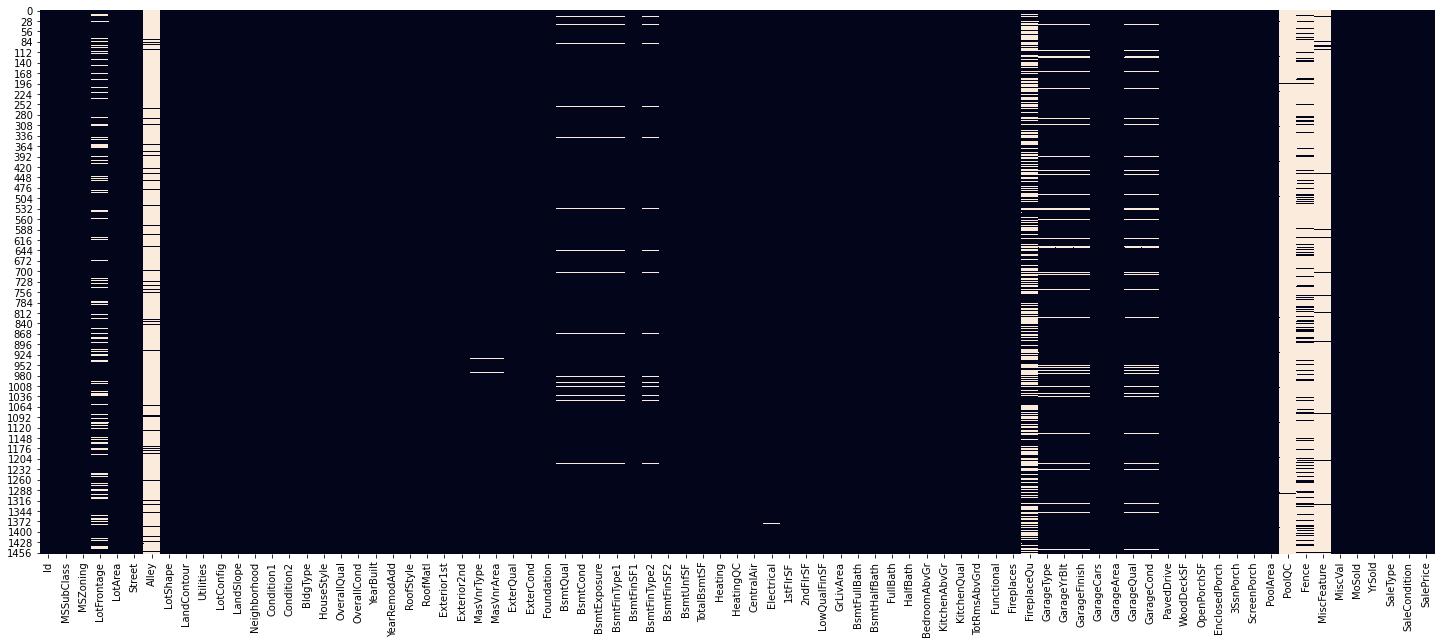

In [10]:
fig = plt.subplots(figsize=(25,10))
sns.heatmap(train.isnull(), cbar=False)

##Feature Selection



In [13]:
# label encoding categoricals columns

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_features=[x for x in train.columns if train[x].dtype=="object"]

for col in cat_features:
    if col in categorical_cols.columns:
        i = categorical_cols.columns.get_loc(col)
        categorical_cols.iloc[:,i] = categorical_cols.apply(lambda i:le.fit_transform(i.astype(str)), axis=0, result_type='expand')


#Correlation between columns in categorical and SalePrice
categorical_cols['SalePrice']=train['SalePrice']
correlation_cat = categorical_cols.corr()
correlation_cat.sort_values(["SalePrice"], ascending = False, inplace = True)
correlation_cat.SalePrice

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

SalePrice        1.000000
Foundation       0.382479
CentralAir       0.251328
Electrical       0.234716
PavedDrive       0.231357
RoofStyle        0.222405
SaleCondition    0.213092
Neighborhood     0.210851
HouseStyle       0.180163
Fence            0.140640
Alley            0.139868
RoofMatl         0.132383
ExterCond        0.117303
Functional       0.115328
Exterior2nd      0.103766
Exterior1st      0.103551
Condition1       0.091155
MiscFeature      0.073609
LandSlope        0.051152
Street           0.041036
MasVnrType       0.029658
GarageCond       0.025149
LandContour      0.015453
BsmtCond         0.015058
BsmtFinType2     0.008041
Condition2       0.007513
GarageQual       0.006861
Utilities       -0.014314
SaleType        -0.054911
LotConfig       -0.067396
BldgType        -0.085591
Heating         -0.098812
BsmtFinType1    -0.103114
PoolQC          -0.126070
MSZoning        -0.166872
LotShape        -0.255580
BsmtExposure    -0.309043
HeatingQC       -0.400178
GarageType  

In [16]:
#Finding columns miss values
cols_mis = train.isnull().sum()
cols_mis[cols_mis>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

## Processing Data

In [19]:

train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
#dropping columns null values>300 in train, test
columns_1 =['Id','Alley','FireplaceQu','PoolQC','Fence','MiscFeature']
train.drop(columns_1,axis=1, inplace=True)
test.drop(columns_1,axis=1,inplace= True)
#Seperating data in numaric columns and categorical columns
numaric_cols = train.select_dtypes(exclude=['object'])
categorical_cols = train.select_dtypes(include=['object'])
numaric_cols1 = test.select_dtypes(exclude=['object'])
categorical_cols1 = test.select_dtypes(include=['object'])

In [20]:
numaric_cols.isnull().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

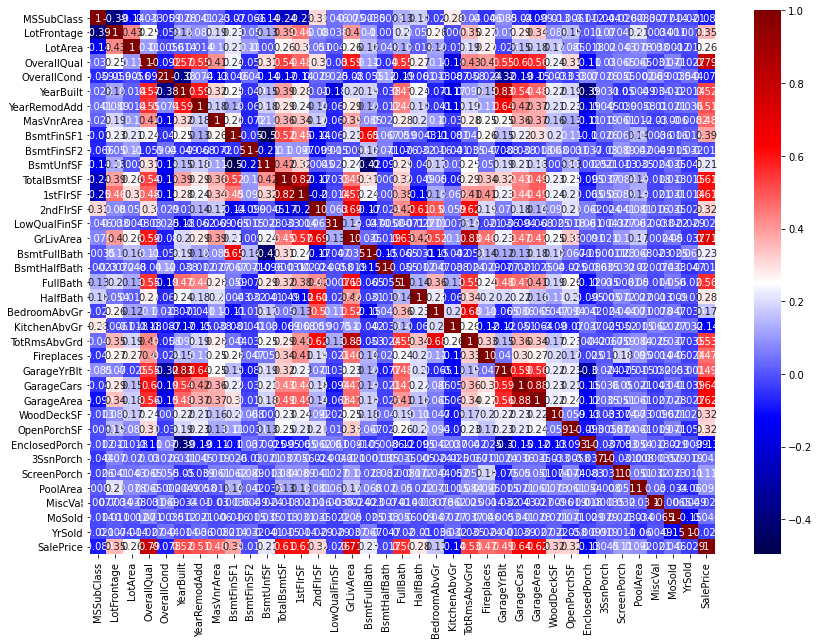

In [21]:
#correlation columns in train
plt.figure(figsize=(14,10))
sns.heatmap(numaric_cols.corr(),annot=True,cmap='seismic')

In [23]:
# label encoding categoricals columns

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_features=[x for x in train.columns if train[x].dtype=="object"]

for col in cat_features:
    if col in categorical_cols.columns:
        i = categorical_cols.columns.get_loc(col)
        categorical_cols.iloc[:,i] = categorical_cols.apply(lambda i:le.fit_transform(i.astype(str)), axis=0, result_type='expand')


#Correlation between columns in categorical and SalePrice
categorical_cols['SalePrice']=train['SalePrice']
correlation_cat = categorical_cols.corr()
correlation_cat.sort_values(["SalePrice"], ascending = False, inplace = True)
correlation_cat.SalePrice

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

SalePrice        1.000000
Foundation       0.382479
CentralAir       0.251328
Electrical       0.234716
PavedDrive       0.231357
RoofStyle        0.222405
SaleCondition    0.213092
Neighborhood     0.210851
HouseStyle       0.180163
RoofMatl         0.132383
ExterCond        0.117303
Functional       0.115328
Exterior2nd      0.103766
Exterior1st      0.103551
Condition1       0.091155
LandSlope        0.051152
Street           0.041036
MasVnrType       0.029658
GarageCond       0.025149
LandContour      0.015453
BsmtCond         0.015058
BsmtFinType2     0.008041
Condition2       0.007513
GarageQual       0.006861
Utilities       -0.014314
SaleType        -0.054911
LotConfig       -0.067396
BldgType        -0.085591
Heating         -0.098812
BsmtFinType1    -0.103114
MSZoning        -0.166872
LotShape        -0.255580
BsmtExposure    -0.309043
HeatingQC       -0.400178
GarageType      -0.415283
GarageFinish    -0.549247
KitchenQual     -0.589189
BsmtQual        -0.620886
ExterQual   

### Filling missing data

In [24]:

#train 
numaric_cols_mis=[x for x in numaric_cols.columns if numaric_cols[x].isnull().sum()>0]
catogerical_cols_mis=[x for x in categorical_cols.columns if categorical_cols[x].isnull().sum()>0]
for i in numaric_cols_mis:
  if i in numaric_cols.columns:
    numaric_cols[i]=numaric_cols[i].fillna(numaric_cols[i].mean())
for j in catogerical_cols_mis:
  if j in categorical_cols.columns:
    categorical_cols[j]=categorical_cols[j].fillna(categorical_cols[j].mode()[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [25]:
#test
numaric_cols_mis1=[x for x in numaric_cols1.columns if numaric_cols1[x].isnull().sum()>0]
catogerical_cols_mis1=[x for x in categorical_cols1.columns if categorical_cols1[x].isnull().sum()>0]
for i in numaric_cols_mis1:
  if i in numaric_cols1.columns:
    numaric_cols1[i]=numaric_cols1[i].fillna(numaric_cols1[i].mean())
for j in catogerical_cols_mis1:
  if j in categorical_cols1.columns:
    categorical_cols1[j]=categorical_cols1[j].fillna(categorical_cols1[j].mode()[0])



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [27]:
categorical_cols.isnull().sum()


MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

### Process Data

In [28]:
#convert columns from object to category
#train
for column in categorical_cols.select_dtypes(include=object).columns:
     categorical_cols[column]=categorical_cols[column].astype('category')
#test
for column in categorical_cols1.select_dtypes(include=object).columns:
     categorical_cols1[column]=categorical_cols1[column].astype('category')
# encoder categorical_columns 
for column in categorical_cols.select_dtypes(include='category').columns:
     categorical_cols[column]=categorical_cols[column].cat.codes

for column in categorical_cols1.select_dtypes(include='category').columns:
     categorical_cols1[column]=categorical_cols1[column].cat.codes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [29]:
#Using MinMaxScaler to encoder numraic columns
from sklearn.preprocessing import MinMaxScaler
le = MinMaxScaler()
numaric_cols.iloc[:,:-1] = le.fit_transform(numaric_cols.iloc[:,:-1])
numaric_cols1.iloc[:,:-1] = le.fit_transform(numaric_cols1.iloc[:,:-1])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [ ]:
# combine numaric columns and categorical columns into trainset , testset 
df_train = pd.concat([numaric_cols,categorical_cols], axis=1)
df_test = pd.concat([numaric_cols1,categorical_cols1], axis=1)

## Model Section

In [ ]:
y = df_train['SalePrice']
X = df_train.drop(['SalePrice'], axis=1)

In [ ]:
print(X.shape)
print(df_test.shape)

(1460, 74)
(1459, 74)


In [ ]:
test1 = pd.read_csv("/content/test.csv")

In [ ]:
import xgboost as xgb 
final_model = xgb.XGBRegressor(max_depth = 6, min_child_weight = 4, eta = 0.1)
final_model.fit(X,y)
xg_pred = final_model.predict(df_test)
output = pd.DataFrame({'Id': test1["Id"], 'SalePrice': xg_pred})

print(output)
output.to_csv('my_submission.csv', index=False)

[06:10:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
        Id      SalePrice
0     1461  135540.703125
1     1462  153195.437500
2     1463  177466.187500
3     1464  204842.328125
4     1465  211603.984375
...    ...            ...
1454  2915   84654.937500
1455  2916   93550.867188
1456  2917  154484.859375
1457  2918  134504.734375
1458  2919  266368.062500

[1459 rows x 2 columns]
